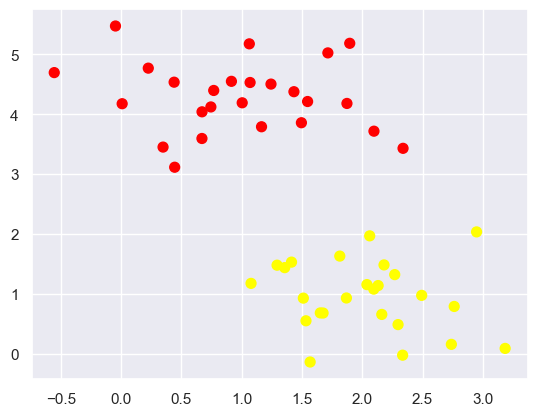

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#import data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


****PERCEPTRON****

weights:
[ 0.04150202 -0.03534622]


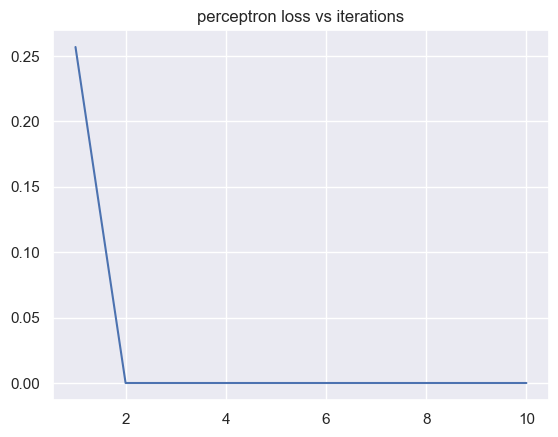

Perceptron accuracy: 1.0


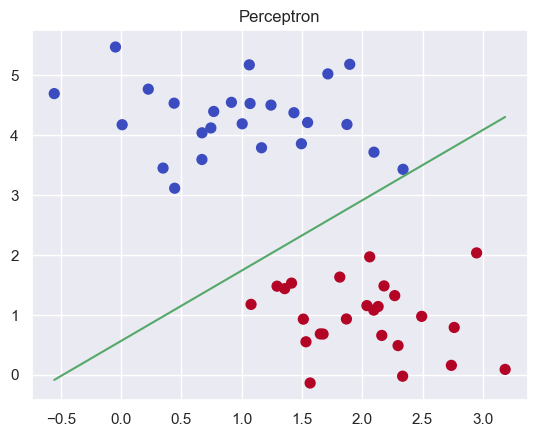

In [2]:
def percept_scratch (X_train, y_train, learn_rate, iterations):
    samples, features = X_train.shape
    weights = np.zeros(features)
    bias = 0
    y_update = np.where(y_train > 0, 1, -1)
    ploss_arr = []

    #fit
    for _ in range(iterations):
        ploss = 0
        for index, x_i in enumerate(X_train):
            y_pred = np.dot(x_i, weights) + bias
            y_pred_sign = np.where(y_pred > 0, 1, -1) #hypothesis space funct
            #perceptron loss
            ploss += max(0, -y_update[index] * y_pred)
            #using sub-gradient descent
            delta = y_update[index] - y_pred_sign #if correctly classified = 0 *no change
            weights = weights + (learn_rate * delta) * x_i
            bias = bias + (learn_rate * delta)
        ploss_arr.append(ploss)

    print('weights:')
    print(weights)

    #plot ploss
    iters = np.arange(1, iterations+1)
    plt.plot(iters,ploss_arr)
    plt.title("perceptron loss vs iterations")
    plt.show()

    #predict
    y_output = np.dot(X_train, weights) + bias
    y_pred = np.where(y_output > 0, 1, -1)

    #check for misclassification
    accuracy = np.sum(y_update == y_pred) / len(y)
    print('Perceptron accuracy: ' + str(accuracy))

    # display the findings
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], s=50, c=y_train, cmap='coolwarm')

    #get start and stop points
    x1 = np.amin(X_train[:, 0])
    x2 = np.amax(X_train[:, 0])
    y1 = (-weights[0] * x1 - bias) / weights[1]
    y2 = (-weights[0] * x2 - bias) / weights[1]
    
    #plot line
    ax.plot([x1, x2], [y1, y2], 'g')
    plt.title("Perceptron")
   
    plt.show()

print('\n****PERCEPTRON****\n')
percept_scratch(X,y,0.01,10)



****SVM****

weights:
[ 0.2383286  -1.41426587]
SVM accuracy 1.0


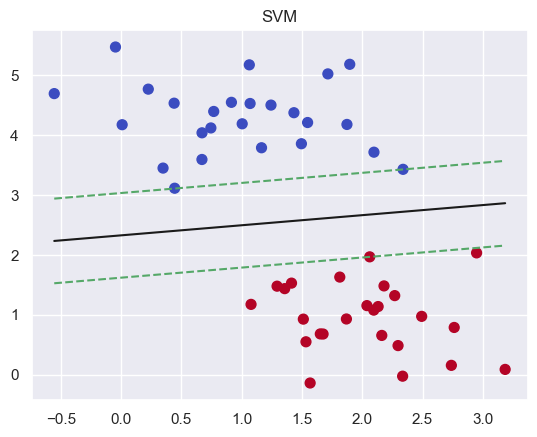

In [3]:
def SVM_scratch(X,y,learn_rate,iterations, lam):
    samples, features = X.shape
    weights = np.zeros(features)
    bias = 0
    y_update = np.where(y <= 0, -1, 1)
    hinge_loss_arr = []

    for _ in range(iterations):
        for index, x_i in enumerate(X):
            descision_funct = y_update[index] * (np.dot(x_i, weights) - bias)
            hinge_loss = max(0, 1 - descision_funct)
            #subgradients calculations
            w_gradient = 0
            b_gradient = 0
            if((hinge_loss) <= 0):
                w_gradient = (2 * lam * weights)
                b_gradient = 0
            else:
                w_gradient = (2 * lam * weights - np.dot(x_i, y_update[index]))
                b_gradient = y_update[index]
            weights = weights - learn_rate * w_gradient
            bias = bias - learn_rate * b_gradient
        hinge_loss_arr.append(hinge_loss/samples)
        
    print('weights:')
    print(weights)
    
    approx = np.sign(np.dot(X, weights) - bias)

    accuracy = np.sum(y_update == approx) / len(y)
    print('SVM accuracy ' + str(accuracy))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='coolwarm')

    #get start and stop points
    x1 = np.amin(X[:, 0])
    x2 = np.amax(X[:, 0])
    y1 = (-weights[0] * x1 + bias) / weights[1]
    y2 = (-weights[0] * x2 + bias) / weights[1]

    y1_l = (-weights[0] * x1 + bias - 1) / weights[1]
    y2_l = (-weights[0] * x2 + bias - 1) / weights[1]

    y1_u = (-weights[0] * x1 + bias + 1) / weights[1]
    y2_u = (-weights[0] * x2 + bias + 1) / weights[1]

    ax.plot([x1, x2], [y1, y2], 'k')
    ax.plot([x1, x2], [y1_u, y2_u], 'g--')
    ax.plot([x1, x2], [y1_l, y2_l], 'g--')

    plt.title("SVM")
    plt.show()

print('\n****SVM****\n')
SVM_scratch(X,y,.001,10000, .005)